In [4]:
import scvi
import numpy as np
import pandas as pd 
import scanpy as sc
import os
from sklearn.metrics import confusion_matrix
import importlib
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import scanvi

In [7]:
importlib.reload(scanvi)

<module 'scanvi' from '/n/groups/marks/users/tessa/perturb/single_cell_perturbation_data/code/scanvi.py'>

In [2]:
adata = sc.read_h5ad("/n/groups/marks/users/tessa/perturb/datasets/ZhaoSims2021/ZhaoSims2021/ZhaoSims2021.h5")



/n/groups/marks/users/tessa/perturb/single_cell_perturbation_data/code/scanvi.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selection = np.hstack(np.array([np.random.choice(adata.obs_names[adata.obs[obs_key]==p],
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|███████| 400/400 [09:31<00:00,  1.43s/it, loss=432, v_num=1]
INFO     Training for 10 epochs.                                                             


/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/scvi/model/_scanvi.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels == self.unlabeled_category_
/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/scvi/model/_scanvi.py:255: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self._labeled_indices = np.argwhere(labels != self.unlabeled_category_).ravel()
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 10/10: 100%|███████████| 10/10 [00:32<00:00,  3.22s/it, loss=488, v_num=1]


/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


SCVI Model with the following params: 
n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, dispersion: gene, 
gene_likelihood: zinb, latent_distribution: normal
Training status: Trained

ScanVI Model with the following params: 
unlabeled_category: Unknown, n_hidden: 128, n_latent: 10, n_layers: 1, dropout_rate: 0.1, 
dispersion: gene, gene_likelihood: zinb
Training status: Trained

(AnnData object with n_obs × n_vars = 3758 × 2000
     obs: 'sample', 'GEO', 'Sample', 'tissue', 'age', 'sex', 'location', 'diagnosis', 'library', 'dose_value', 'dose_unit', 'perturbation', 'tissue_type', 'cancer', 'disease', 'celltype', 'organism', 'perturbation_type', 'ncounts', 'ngenes', 'percent_mito', 'percent_ribo', 'nperts', 'heldout_0.2', '_scvi_batch', '_scvi_labels', 'scANVI_labels'
     var: 'ncounts', 'ncells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
     uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap'
     obsm: 'X_scANVI', 'X_umap'
     obsp: 'distances', 'connectivities',
 ,
 )

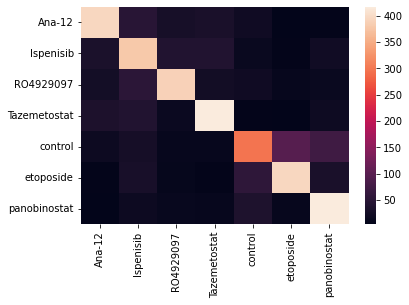

In [5]:
scanvi.classify_with_scanvi(adata, pct = 0.2, withheld_labels_name = "heldout", batch_key="sample", outdir = "/n/groups/marks/users/tessa/perturb/scanvi/ZhaoSims2021/")


In [9]:
dataset_to_batchkey = {
    #'ZhaoSims2021': 'sample',
    #'DatlingerBock2017' : 'replicate',  # not sure though if this is reasonable to use. Also: has a second perturbation "perturbation_2"
    #'DatlingerBock2021': 'sample', # N_min  = 300
    #'AdamsonWeissman2016_GSM2406677_10X005': None,
    #'AdamsonWeissman2016_GSM2406681_10X010': None,
    # 'AdamsonWeissman2016_GSM2406675_10X001': None,
    #'AissaBenevolenskaya2021': 'batch',
    #'WeinrebKlein2020': 'age',  # timecourse experiment
    'SrivatsanTrapnell2020_sciplex2': None,
    'SrivatsanTrapnell2020_sciplex3': 'cell_line',  # watch out there are Nones it seems (I think those could not be multiplexed fully!)
    'SrivatsanTrapnell2020_sciplex4': 'cell_line',  # watch out there are Nones it seems (I think those could not be multiplexed fully!)
    'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen': 'replicate',
    'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen': 'replicate',
    'SchiebingerLander2019_GSE115943': 'replicate',
    'SchiebingerLander2019_GSE106340': None,
    'ShifrutMarson2018': 'library'  # this includes replicate x perturbation_2
}

In [ ]:
for entry in dataset_to_batchkey:
    if os.path.exists("/n/groups/marks/users/tessa/perturb/scanvi/"+entry+"/"):
        print("results folder already exists, skipping "+entry)
    else:
        if os.path.exists("/n/groups/marks/users/tessa/perturb/datasets/"+entry+"/"+entry+"/"+entry+".h5"):
            adata = sc.read_h5ad("/n/groups/marks/users/tessa/perturb/datasets/"+entry+"/"+entry+"/"+entry+".h5")
        elif os.path.exists("/n/groups/marks/users/tessa/perturb/datasets/"+entry+"/"+entry+".h5"):
            adata = sc.read_h5ad("/n/groups/marks/users/tessa/perturb/datasets/"+entry+"/"+entry+".h5")
        elif "_" in entry:
            adata = sc.read_h5ad("/n/groups/marks/users/tessa/perturb/datasets/"+entry.split("_")[0]+"/"+entry+"/"+entry+".h5")

            #adata = sc.read_h5ad("/n/groups/marks/users/tessa/perturb/datasets/"+entry.split("_")[0]+"/"+entry+".h5")
        else:
            print("unable to locate data for: "+entry)
        scanvi.classify_with_scanvi(adata, pct = 0.2, withheld_labels_name ="heldout" , batch_key=dataset_to_batchkey[entry], outdir = "/n/groups/marks/users/tessa/perturb/scanvi/"+entry+"/")


/n/groups/marks/users/tessa/perturb/single_cell_perturbation_data/code/scanvi.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  selection = np.hstack(np.array([np.random.choice(adata.obs_names[adata.obs[obs_key]==p],


training scVI model


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|███████| 400/400 [01:24<00:00,  4.73it/s, loss=157, v_num=1]
training scANVI model
INFO     Training for 50 epochs.                                                             


/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/scvi/model/_scanvi.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  labels == self.unlabeled_category_
/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/scvi/model/_scanvi.py:255: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  self._labeled_indices = np.argwhere(labels != self.unlabeled_category_).ravel()
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 50/50: 100%|███████████| 50/50 [00:21<00:00,  2.28it/s, loss=198, v_num=1]
calculating outputs
saving results


/n/groups/marks/software/anaconda_o2/envs/scvi2/lib/python3.9/site-packages/anndata/_core/anndata.py:1235: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


In [5]:
stringthing = "a_b"

In [7]:
stringthing.split("_")[0]

'a'

In [15]:
entry="DatlingerBock2017"
os.path.exists("/n/groups/marks/users/tessa/perturb/scanvi/"+entry+"/")


False

In [18]:
entry="ZhaoSims2021"
os.path.exists("/n/groups/marks/users/tessa/perturb/scanvi/"+entry+"/")

True